In [1]:
from pathlib import Path
import torchvision.models as models
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor
import numpy as np
from torch_lr_finder import LRFinder
import os
from torch import nn

  pip install torch-lr-finder -v --global-option="amp"


In [2]:
import pixiedust
import torch
from torch import nn
import pathlib
from torch.utils.data import DataLoader
from torchvision import *

Pixiedust database opened successfully


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
torch.cuda.empty_cache()

In [5]:
transformtrain= transforms.Compose([
    transforms.Resize((250,250)),
    
    transforms.ToTensor(),              #convert the value to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])         # convert all the value form -1 to 1 for all RGB
])

In [6]:
transformvalid= transforms.Compose([
    transforms.Resize((250,250)),
    transforms.ToTensor(),
    #convert the value to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])         # convert all the value form -1 to 1 for all RGB
])

In [7]:
from pathlib import Path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects
#torch.cuda.set_device(3)
import collections
import numpy as np

In [8]:
import os
import numpy as np
import torch
from PIL import Image


In [9]:
root="pascal_2007/train"

In [10]:
imgs = list(sorted(os.listdir(root)))

In [11]:
root='pascal_2007'

In [12]:
train = list(sorted(os.listdir(os.path.join(root, "train"))))

In [13]:
len(train)

5011

In [14]:
pil2tensor = transforms.Compose([
    transforms.Resize((250,250)),
    
    transforms.ToTensor(),              #convert the value to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])         # convert all the value form -1 to 1 for all RGB
])

In [15]:
val = list(sorted(os.listdir(os.path.join(root, "test"))))

In [16]:
#trainloader=DataLoader(allimg, batch_size=64, shuffle=True)

In [17]:
#valloader=DataLoader(allimgval,batch_size=64,shuffle=True)

In [18]:
PATH = Path('pascal_2007')
list(PATH.iterdir())

[WindowsPath('pascal_2007/segmentation'),
 WindowsPath('pascal_2007/test'),
 WindowsPath('pascal_2007/test.csv'),
 WindowsPath('pascal_2007/test.json'),
 WindowsPath('pascal_2007/train'),
 WindowsPath('pascal_2007/train.csv'),
 WindowsPath('pascal_2007/train.json'),
 WindowsPath('pascal_2007/valid.json')]

In [19]:
trn_j = json.load((PATH/'train.json').open())
trn_j.keys()

dict_keys(['images', 'type', 'annotations', 'categories'])

In [20]:
IMAGES,ANNOTATIONS,CATEGORIES = ['images', 'annotations', 'categories']
trn_j[IMAGES][:5]

[{'file_name': '000012.jpg', 'height': 333, 'width': 500, 'id': 12},
 {'file_name': '000017.jpg', 'height': 364, 'width': 480, 'id': 17},
 {'file_name': '000023.jpg', 'height': 500, 'width': 334, 'id': 23},
 {'file_name': '000026.jpg', 'height': 333, 'width': 500, 'id': 26},
 {'file_name': '000032.jpg', 'height': 281, 'width': 500, 'id': 32}]

In [21]:
trn_j[ANNOTATIONS][:2]

[{'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]],
  'area': 34104,
  'iscrowd': 0,
  'image_id': 12,
  'bbox': [155, 96, 196, 174],
  'category_id': 7,
  'id': 1,
  'ignore': 0},
 {'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]],
  'area': 13110,
  'iscrowd': 0,
  'image_id': 17,
  'bbox': [184, 61, 95, 138],
  'category_id': 15,
  'id': 2,
  'ignore': 0}]

In [22]:
FILE_NAME,ID,IMG_ID,CAT_ID,BBOX = 'file_name','id','image_id','category_id','bbox'

cats = {o[ID]:o['name'] for o in trn_j[CATEGORIES]}
trn_fns = {o[ID]:o[FILE_NAME] for o in trn_j[IMAGES]}
trn_ids = [o[ID] for o in trn_j[IMAGES]]

In [23]:
len(trn_fns)

2501

In [24]:
JPEGS = 'train'

In [25]:
IMG_PATH = PATH/JPEGS
list(IMG_PATH.iterdir())[:5]

[WindowsPath('pascal_2007/train/000005.jpg'),
 WindowsPath('pascal_2007/train/000007.jpg'),
 WindowsPath('pascal_2007/train/000009.jpg'),
 WindowsPath('pascal_2007/train/000012.jpg'),
 WindowsPath('pascal_2007/train/000016.jpg')]

In [26]:
def hw_bb(bb): return np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])

trn_anno = collections.defaultdict(lambda:[])
for o in trn_j[ANNOTATIONS]:
    if not o['ignore']:
        bb = o[BBOX]
        bb = hw_bb(bb)
        trn_anno[o[IMG_ID]].append((bb,o[CAT_ID]))
        
len(trn_anno)

2501

In [27]:
trn_anno

defaultdict(<function __main__.<lambda>()>,
            {12: [(array([ 96, 155, 269, 350]), 7)],
             17: [(array([ 61, 184, 198, 278]), 15),
              (array([ 77,  89, 335, 402]), 13)],
             23: [(array([229,   8, 499, 244]), 2),
              (array([219, 229, 499, 333]), 2),
              (array([  0,   1, 368, 116]), 15),
              (array([  1,   2, 461, 242]), 15),
              (array([  0, 224, 485, 333]), 15)],
             26: [(array([124,  89, 211, 336]), 7)],
             32: [(array([ 77, 103, 182, 374]), 1),
              (array([ 87, 132, 122, 196]), 1),
              (array([179, 194, 228, 212]), 15),
              (array([188,  25, 237,  43]), 15)],
             33: [(array([106,   8, 262, 498]), 1),
              (array([199, 420, 225, 481]), 1),
              (array([187, 324, 222, 410]), 1)],
             34: [(array([166, 115, 399, 359]), 19),
              (array([152, 140, 228, 332]), 19)],
             35: [(array([ 95,   0, 360, 190]), 

In [28]:
trn_ids = [o[ID] for o in trn_j[IMAGES]]

In [29]:
def get_lrg(b):
    if not b: raise Exception()
    b = sorted(b, key=lambda x: np.product(x[0][-2:]-x[0][:2]), reverse=True)
    return b[0]

In [30]:
trn_lrg_anno = {a: get_lrg(b) for a,b in trn_anno.items()}

In [31]:
trn_anno.items()

dict_items([(12, [(array([ 96, 155, 269, 350]), 7)]), (17, [(array([ 61, 184, 198, 278]), 15), (array([ 77,  89, 335, 402]), 13)]), (23, [(array([229,   8, 499, 244]), 2), (array([219, 229, 499, 333]), 2), (array([  0,   1, 368, 116]), 15), (array([  1,   2, 461, 242]), 15), (array([  0, 224, 485, 333]), 15)]), (26, [(array([124,  89, 211, 336]), 7)]), (32, [(array([ 77, 103, 182, 374]), 1), (array([ 87, 132, 122, 196]), 1), (array([179, 194, 228, 212]), 15), (array([188,  25, 237,  43]), 15)]), (33, [(array([106,   8, 262, 498]), 1), (array([199, 420, 225, 481]), 1), (array([187, 324, 222, 410]), 1)]), (34, [(array([166, 115, 399, 359]), 19), (array([152, 140, 228, 332]), 19)]), (35, [(array([ 95,   0, 360, 190]), 15), (array([ 97, 217, 317, 464]), 15)]), (36, [(array([ 78,  26, 343, 318]), 12)]), (42, [(array([ 31, 262, 294, 499]), 19), (array([ 35,   0, 298, 234]), 19)]), (44, [(array([  0,   0, 329, 369]), 9), (array([100,  98, 212, 311]), 8)]), (47, [(array([  0,  14, 311, 458]), 

In [32]:
bb = np.array([trn_lrg_anno[o][0] for o in trn_ids])

In [33]:
len(bb)

2501

In [34]:
trn_fns

{12: '000012.jpg',
 17: '000017.jpg',
 23: '000023.jpg',
 26: '000026.jpg',
 32: '000032.jpg',
 33: '000033.jpg',
 34: '000034.jpg',
 35: '000035.jpg',
 36: '000036.jpg',
 42: '000042.jpg',
 44: '000044.jpg',
 47: '000047.jpg',
 48: '000048.jpg',
 61: '000061.jpg',
 64: '000064.jpg',
 66: '000066.jpg',
 73: '000073.jpg',
 77: '000077.jpg',
 78: '000078.jpg',
 83: '000083.jpg',
 89: '000089.jpg',
 91: '000091.jpg',
 104: '000104.jpg',
 112: '000112.jpg',
 122: '000122.jpg',
 129: '000129.jpg',
 133: '000133.jpg',
 134: '000134.jpg',
 138: '000138.jpg',
 140: '000140.jpg',
 141: '000141.jpg',
 147: '000147.jpg',
 153: '000153.jpg',
 154: '000154.jpg',
 159: '000159.jpg',
 161: '000161.jpg',
 162: '000162.jpg',
 163: '000163.jpg',
 164: '000164.jpg',
 171: '000171.jpg',
 173: '000173.jpg',
 174: '000174.jpg',
 187: '000187.jpg',
 189: '000189.jpg',
 192: '000192.jpg',
 193: '000193.jpg',
 194: '000194.jpg',
 198: '000198.jpg',
 200: '000200.jpg',
 207: '000207.jpg',
 209: '000209.jpg',
 2

In [35]:
# allimg=[]
# for i in range(len(trn_fns)):
#     img_path = os.path.join(root, "train", imgs[i])
#     img = Image.open(img_path).convert("RGB")
#     img=pil2tensor(img)
#     allimg.append(img,box)

In [36]:
len(train)

5011

In [37]:
def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1]+1,a[2]-a[0]+1])

In [38]:
traindata=[]
for i,k in enumerate(trn_fns):
    img_path = os.path.join(root, "train", trn_fns[k])
    img = Image.open(img_path).convert("RGB")
    img=pil2tensor(img)
    box=trn_lrg_anno[k][0] 
    traindata.append((img,box))


In [39]:
trn_fns

{12: '000012.jpg',
 17: '000017.jpg',
 23: '000023.jpg',
 26: '000026.jpg',
 32: '000032.jpg',
 33: '000033.jpg',
 34: '000034.jpg',
 35: '000035.jpg',
 36: '000036.jpg',
 42: '000042.jpg',
 44: '000044.jpg',
 47: '000047.jpg',
 48: '000048.jpg',
 61: '000061.jpg',
 64: '000064.jpg',
 66: '000066.jpg',
 73: '000073.jpg',
 77: '000077.jpg',
 78: '000078.jpg',
 83: '000083.jpg',
 89: '000089.jpg',
 91: '000091.jpg',
 104: '000104.jpg',
 112: '000112.jpg',
 122: '000122.jpg',
 129: '000129.jpg',
 133: '000133.jpg',
 134: '000134.jpg',
 138: '000138.jpg',
 140: '000140.jpg',
 141: '000141.jpg',
 147: '000147.jpg',
 153: '000153.jpg',
 154: '000154.jpg',
 159: '000159.jpg',
 161: '000161.jpg',
 162: '000162.jpg',
 163: '000163.jpg',
 164: '000164.jpg',
 171: '000171.jpg',
 173: '000173.jpg',
 174: '000174.jpg',
 187: '000187.jpg',
 189: '000189.jpg',
 192: '000192.jpg',
 193: '000193.jpg',
 194: '000194.jpg',
 198: '000198.jpg',
 200: '000200.jpg',
 207: '000207.jpg',
 209: '000209.jpg',
 2

In [40]:
# for i,k in enumerate(trn_fns):
#     img_path = os.path.join(root,"train", trn_fns[k])
#     img = Image.open(img_path).convert("RGB")
#     img = pil2tensor(img)
#     box = trn_lrg_anno[k][0]
#     traindata.append((img,box))

In [41]:
len(traindata)

2501

In [42]:
trainloader=DataLoader(traindata, batch_size=16, shuffle=True)

In [43]:
PATH = Path('pascal_2007')
list(PATH.iterdir())

trn_j = json.load((PATH/'test.json').open())
trn_j.keys()

IMAGES,ANNOTATIONS,CATEGORIES = ['images', 'annotations', 'categories']
trn_j[IMAGES][:5]

trn_j[ANNOTATIONS][:2]

FILE_NAME,ID,IMG_ID,CAT_ID,BBOX = 'file_name','id','image_id','category_id','bbox'

trn_fns = {o[ID]:o[FILE_NAME] for o in trn_j[IMAGES]}

len(trn_fns)

JPEGS = 'test'

IMG_PATH = PATH/JPEGS
list(IMG_PATH.iterdir())[:5]

def hw_bb(bb): return np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])

trn_anno = collections.defaultdict(lambda:[])
for o in trn_j[ANNOTATIONS]:
    if not o['ignore']:
        bb = o[BBOX]
        bb = hw_bb(bb)
        trn_anno[o[IMG_ID]].append((bb,o[CAT_ID]))
        
len(trn_anno)

trn_anno

trn_ids = [o[ID] for o in trn_j[IMAGES]]



def get_lrg(b):
    if not b: raise Exception()
    b = sorted(b, key=lambda x: np.product(x[0][-2:]-x[0][:2]), reverse=True)
    return b[0]

trn_lrg_anno = {a: get_lrg(b) for a,b in trn_anno.items()}



bb = np.array([trn_lrg_anno[o][0] for o in trn_ids])

len(bb)

len(trn_fns)



len(train)

valdata=[]
for i,k in enumerate(trn_fns):
    img_path = os.path.join(root, "test", trn_fns[k])
    img = Image.open(img_path).convert("RGB")
    img=pil2tensor(img)
    box=trn_lrg_anno[k][0] 
    valdata.append((img,box))



valloader=DataLoader(valdata, batch_size=16, shuffle=True)



In [44]:
a,b=next(iter(valdata))

In [45]:
a

tensor([[[-2.1008, -2.1008, -2.1008,  ..., -2.0665, -2.0665, -2.1008],
         [-2.1008, -2.1008, -2.1008,  ..., -2.0494, -2.0665, -2.0837],
         [-2.1008, -2.1008, -2.1008,  ..., -2.0152, -2.0494, -2.0665],
         ...,
         [-1.8268, -1.7069, -1.5357,  ..., -1.4672, -1.5357, -1.5870],
         [-1.5870, -1.5185, -1.8610,  ..., -1.5870, -1.6555, -1.6042],
         [-1.8439, -1.4843, -1.6898,  ..., -1.4843, -1.5870, -1.6213]],

        [[-2.0182, -2.0182, -2.0182,  ..., -1.9482, -1.9482, -1.9832],
         [-2.0182, -2.0182, -2.0182,  ..., -1.9307, -1.9482, -2.0007],
         [-2.0182, -2.0182, -2.0182,  ..., -1.9307, -1.9657, -2.0007],
         ...,
         [-1.3529, -1.3354, -1.2129,  ..., -0.7927, -0.9328, -1.0553],
         [-1.3004, -1.2304, -1.4230,  ..., -0.9153, -1.0378, -1.0903],
         [-1.5805, -1.1954, -1.2479,  ..., -0.8452, -0.9853, -1.0903]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.7347, -1.7347, -1.7696],
         [-1.8044, -1.8044, -1.8044,  ..., -1

In [46]:
b

array([ 11,   7, 497, 351])

In [47]:
a.size()

torch.Size([3, 250, 250])

In [48]:
type(next(iter(valloader)))

list

In [49]:
a,b=next(iter(trainloader))

In [50]:
type(a)

torch.Tensor

In [51]:
a.size()

torch.Size([16, 3, 250, 250])

In [52]:
type(next(iter(trainloader)))

list

In [53]:
model = models.densenet161(pretrained=True).to(device)

In [54]:
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [55]:

for param in model.parameters():
    param.requires_grad=False

In [56]:
# for name, param in model.named_parameters():
#     print(name)

In [57]:
#modelbox = nn.Sequential(model,Flatten(), nn.Linear(1000,4)).to(device)

In [58]:
# for param in model.parameters():
#     print(param)

In [59]:
#modelbox

In [60]:
model.classifier=nn.Linear(model.classifier.in_features,4).to(device)
criterion=nn.L1Loss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.000001)


Learning rate search finished. See the graph with {finder_name}.plot()


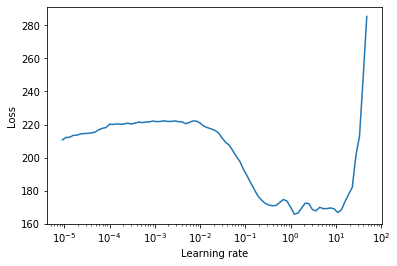

In [61]:
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=100, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [62]:
# optimizer=torch.optim.Adam(model.parameters(),lr=0.00001)
# lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
# lr_finder.range_test(trainloader, val_loader=valloader, end_lr=100, num_iter=100, step_mode="linear")
# lr_finder.plot(log_lr=False)
# lr_finder.reset()

In [63]:
optimizer=torch.optim.Adam(model.parameters(),lr=0.005)

In [64]:
optimizer.zero_grad()

In [65]:
def accuracy(out, yb): 
    return (torch.argmax(out)==yb).float().mean()
#%%pixie_debugger

In [91]:

# Handle batchnorm / dropout
model.train()
tot_train=0
#         print(model.training)
for xb,yb in trainloader:
    xb, yb = xb.to(device), yb.to(device)
    loss = criterion(model(xb), yb)
    tot_train+=loss
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()


model.eval()
#         print(model.training)
with torch.no_grad():
    tot_loss,tot_acc = 0.,0.
    for xb,yb in valloader:
        xb, yb = xb.to(device), yb.to(device)
        pred = model(xb)
        print(pred)
        print(yb)
#        tot_loss += loss_func(pred, yb)
        
#        tot_acc  += accuracy (pred,yb)
        

tensor([[149.6691, 216.5550, 201.8408, 279.6447],
        [ 48.7846,  51.0486, 224.2346, 450.3572],
        [168.5367, 266.5389, 286.0639, 430.8799],
        [111.6896,  41.8863, 501.1510, 300.2133],
        [ 82.2581, 114.5425, 291.0890, 491.6232],
        [110.4579, 134.3079, 365.5203, 388.8861],
        [110.1591,  35.2237, 337.6416, 381.7086],
        [ 72.7661,  94.0770, 257.6119, 378.8895],
        [ 43.2413,  29.7699, 306.4870, 468.5344],
        [ 64.4482, 126.4704, 231.9483, 303.5709],
        [ 24.7846,  13.5187, 359.4509, 364.7341],
        [ 43.7954,  56.7257, 324.8819, 461.0851],
        [ 89.3307,  11.3488, 253.2998, 434.6810],
        [189.8449, 137.7115, 346.2682, 405.3533],
        [114.6027,  19.9880, 387.1317, 417.7750],
        [ 85.1526,  19.4969, 249.7154, 458.2200]], device='cuda:0')
tensor([[ 92, 152, 158, 198],
        [ 25,  62, 218, 467],
        [179, 272, 324, 434],
        [108, 139, 499, 329],
        [ 87,   9, 302, 481],
        [ 57,  83, 374, 391],
  

tensor([[9.9697e+01, 5.1691e+01, 3.6723e+02, 4.3557e+02],
        [4.9145e+01, 9.1072e+01, 3.7483e+02, 3.1723e+02],
        [2.2780e+01, 9.2193e+00, 3.6761e+02, 4.0595e+02],
        [1.0411e+02, 2.6088e+02, 2.3794e+02, 4.4084e+02],
        [8.8330e+01, 1.5939e+02, 3.4385e+02, 3.8867e+02],
        [4.1687e-01, 1.5815e+02, 4.0314e+02, 4.4544e+02],
        [1.4207e+02, 2.7779e+01, 3.0678e+02, 4.5196e+02],
        [7.3986e+00, 2.2941e+01, 4.1303e+02, 3.5410e+02],
        [2.5189e+01, 4.4161e+01, 3.9414e+02, 4.7317e+02],
        [1.7017e+02, 1.8011e+02, 2.0457e+02, 2.9852e+02],
        [1.5510e+02, 4.4262e+01, 3.2886e+02, 4.6264e+02],
        [2.8345e+01, 7.0189e+01, 4.6115e+02, 3.4750e+02],
        [6.9462e+01, 8.0349e+01, 3.5835e+02, 4.5207e+02],
        [3.4760e+01, 2.4675e+01, 2.6585e+02, 5.2334e+02],
        [1.8346e+02, 1.0207e+02, 2.0420e+02, 1.4296e+02],
        [1.5962e+02, 7.0942e+01, 3.8476e+02, 3.4344e+02]], device='cuda:0')
tensor([[ 94,  75, 324, 431],
        [  0,   7, 393, 

tensor([[ 91.5174,  27.3920, 222.9733, 420.4339],
        [ 42.2124, 196.2869, 299.2353, 346.3946],
        [198.5168, 184.9248, 243.8471, 317.3994],
        [132.3783, 211.8914, 228.3885, 334.2120],
        [ 85.8870,  27.0782, 296.5291, 288.9590],
        [ 88.8260,  73.7332, 313.3216, 410.6243],
        [ 88.2982, 189.6300, 296.3388, 278.1841],
        [ 34.7858,  28.9805, 352.7534, 409.2824],
        [ 88.7192,  -1.3936, 429.2567, 465.6129],
        [222.2447, 181.8677, 297.0680, 342.1805],
        [ 60.0525,  32.1414, 304.1800, 495.0744],
        [ -4.8811, 126.8486, 334.9910, 463.3289],
        [ 72.7663, 153.0031, 295.1731, 293.0107],
        [286.1223, 143.4641, 331.2477, 358.6792],
        [ 30.3326, 209.2336, 395.4868, 443.5714],
        [ 26.8695,  43.7558, 401.4360, 435.7534]], device='cuda:0')
tensor([[101,  17, 206, 454],
        [ 28, 206, 297, 351],
        [185, 191, 232, 310],
        [134, 217, 223, 315],
        [ 95,   0, 344, 290],
        [ 94,  71, 327, 407],
  

tensor([[119.9203, 168.8282, 150.8052, 240.1584],
        [191.0959,  86.6507, 342.2829, 329.5606],
        [ 96.8002,  76.7748, 280.9988, 451.2721],
        [204.9991, 203.4457, 315.3177, 313.4370],
        [ 26.4987,  55.6886, 300.6580, 485.5381],
        [ 40.8095,  35.8253, 291.9277, 365.1148],
        [102.3219,  52.8977, 334.4836, 491.6010],
        [278.0161, 257.7210, 272.5927, 326.2516],
        [ 68.9096,  69.6796, 329.6791, 344.7157],
        [ 18.6215,  80.3565, 365.1126, 420.2989],
        [123.4850, 273.2868, 248.0777, 352.9791],
        [ 76.6775,  48.5669, 409.2021, 412.5156],
        [  2.5963, 120.0134, 331.5273, 481.0738],
        [ 20.0923, 177.3841, 358.9830, 437.3104],
        [179.4750, 179.3921, 394.1596, 371.8286],
        [123.2654,  54.5492, 390.7916, 479.5513]], device='cuda:0')
tensor([[117, 142, 164, 223],
        [194,  46, 374, 343],
        [ 86,  67, 277, 452],
        [357,   0, 499,  49],
        [ 20,  49, 326, 472],
        [  2,  18, 318, 497],
  

tensor([[209.2200, 120.3672, 306.5005, 280.8684],
        [ 49.6850, 159.2020, 306.5382, 333.3748],
        [133.5639,  10.9068, 326.1338, 471.8455],
        [ 70.1603,  31.3421, 448.3821, 323.4634],
        [ 34.3999,  -1.7168, 328.6204, 329.0156],
        [ 31.6262, 104.6444, 379.1072, 355.9623],
        [246.5662, 257.9347, 236.2747, 300.4714],
        [ 39.5251,  30.0950, 336.2932, 478.2150],
        [ 74.7558,  33.1018, 282.7809, 449.4021],
        [168.6638,  23.6700, 300.7020, 162.5539],
        [ -7.8953,  67.9501, 375.2323, 474.3749],
        [168.6974, 259.5136, 359.9925, 463.2280],
        [ 21.7703, 102.6667, 346.7397, 456.4479],
        [ 48.4200,  76.0801, 260.2370, 467.6090],
        [109.7655,  72.7424, 264.6657, 155.7374],
        [194.2793, 130.9396, 360.1028, 334.8637]], device='cuda:0')
tensor([[321,  81, 398, 216],
        [ 38, 145, 309, 301],
        [136,   0, 316, 412],
        [ 91,   5, 499, 329],
        [ 42,   0, 374, 338],
        [ 91, 160, 332, 386],
  

tensor([[125.8767,  99.5450, 307.2341, 314.5199],
        [ 81.2652,  -4.2952, 419.2148, 387.5586],
        [176.2159, 120.8325, 233.4113, 300.7977],
        [109.0490,  53.9611, 371.1617, 429.8751],
        [ 56.5771, 145.0916, 343.0926, 379.0217],
        [143.9702, 230.0094, 320.9606, 310.9414],
        [129.8134,  79.6848, 453.4381, 402.0317],
        [ 73.3376, 113.0217, 293.8803, 332.1284],
        [166.0663, 108.0091, 285.7502, 360.4991],
        [ 13.6770, 166.9803, 435.7654, 294.0914],
        [ 95.5385, 107.3555, 381.7437, 353.4821],
        [ 50.6778, 119.0965, 359.8958, 284.2698],
        [127.4678, 101.5750, 313.8286, 251.2196],
        [ 39.7003,  69.2169, 357.5103, 355.8554],
        [192.0612,  90.3336, 378.7190, 401.3087],
        [152.9660,   6.2810, 360.8008, 242.7288]], device='cuda:0')
tensor([[190,   1, 325, 288],
        [ 43,   1, 353, 457],
        [199,  96, 275, 289],
        [ 73,  21, 310, 453],
        [ 55, 156, 287, 310],
        [ 10, 422, 245, 499],
  

tensor([[138.3317,  86.6819, 372.6649, 429.7736],
        [153.7552, 272.8415, 184.0731, 330.6925],
        [121.1119,  99.9207, 283.8076, 423.3668],
        [ 68.5609,  60.3679, 498.6301, 315.1516],
        [167.7207, 141.0142, 189.0315, 218.4751],
        [160.4016, 281.4650, 325.2438, 423.8995],
        [132.7280, 196.2640, 187.8916, 276.9053],
        [123.1665, 132.5843, 234.7662, 320.8263],
        [ 69.5437,  47.8839, 337.5101, 430.4553],
        [ 44.6321, 102.1333, 344.4201, 338.2085],
        [ 53.9785, 175.4670, 334.7071, 400.2057],
        [ 83.1329,  52.5881, 265.2861, 470.5491],
        [ 71.5565, 198.3678, 304.5654, 395.4563],
        [ 29.5806,  37.6008, 322.1712, 357.4418],
        [ 97.9408,  34.3424, 209.5478, 442.7086],
        [ 24.9908,  85.7000, 330.9312, 439.6520]], device='cuda:0')
tensor([[111,   9, 332, 474],
        [315, 186, 352, 207],
        [178,  17, 272, 367],
        [ 71,  66, 497, 306],
        [162, 147, 199, 226],
        [205, 103, 365, 287],
  

tensor([[ -6.6423,  38.4863, 304.3732, 392.5226],
        [282.1241, 101.6338, 345.2595, 390.8077],
        [188.6548, 239.0614, 225.5463, 276.1069],
        [121.4150,  40.2439, 285.0526, 450.8533],
        [ 70.5824,  75.2866, 408.0172, 334.7411],
        [109.0257,   5.6748, 440.7002, 214.9752],
        [143.1490,  19.1219, 319.5898, 443.3746],
        [ 89.8164, 114.1285, 338.5443, 460.3787],
        [280.0423, 122.1487, 389.0859, 243.2435],
        [132.7072, 143.4335, 215.7656, 246.7158],
        [146.1113,  15.9553, 391.7193, 340.2839],
        [ 68.2103, 101.6808, 336.3354, 430.6272],
        [ 97.1838, 191.9729, 242.0054, 290.2112],
        [ 73.2268,  36.7007, 248.9308, 427.5224],
        [ 27.4579,  22.7700, 446.3430, 364.1815],
        [134.6724, 163.4407, 215.4411, 466.8221]], device='cuda:0')
tensor([[ 88,  65, 374, 378],
        [258,  95, 353, 406],
        [  8, 209,  66, 268],
        [ 80,   1, 316, 420],
        [260, 155, 460, 264],
        [115,   1, 484, 193],
  

tensor([[105.5229, 290.2963, 363.7913, 364.3837],
        [ 49.7202,  75.6550, 282.3217, 424.0380],
        [ 78.1889, 125.3193, 279.6839, 396.2971],
        [ 59.9191, 150.2248, 368.5779, 459.3779],
        [ 39.8714,  31.7219, 299.0306, 315.8440],
        [225.5334,  66.7439, 396.8185, 385.3918],
        [ 29.5713,  30.6680, 330.0867, 195.2503],
        [162.4931,  80.3154, 309.6584, 333.8961],
        [152.3950, 152.5471, 348.8573, 329.5574],
        [ 35.2248, 250.3710, 333.4884, 449.2794],
        [ 54.7081,  68.4059, 306.7451, 373.7808],
        [191.8054,  89.5784, 365.3516, 427.5825],
        [149.7960, 232.4444, 182.8362, 315.1555],
        [ 99.1304, 171.9754, 363.9217, 403.6798],
        [146.7304, 266.9990, 332.1077, 365.4117],
        [187.9315, 147.2517, 324.0627, 390.8256]], device='cuda:0')
tensor([[ 96, 326, 374, 419],
        [ 31,  28, 346, 398],
        [ 87, 169, 247, 375],
        [ 50, 205, 374, 475],
        [ 45,  43, 373, 388],
        [209,  17, 355, 428],
  

tensor([[129.2103,  74.8825, 285.1916, 424.8734],
        [ 84.2734, 131.3614, 360.1387, 449.0855],
        [ 73.7566,  78.1378, 351.3153, 413.5898],
        [ 32.3316,  84.9268, 353.6852, 492.8409],
        [268.9443, 105.2915, 410.1218, 340.5434],
        [ 10.2549,  64.9277, 340.4265, 492.0414],
        [ 32.0618, 135.5207, 302.1082, 312.1853],
        [163.1066, 141.6176, 286.7712, 324.6123],
        [182.5761, 197.9494, 239.3354, 304.6592],
        [134.8532, 178.0211, 343.0192, 367.6743],
        [ 38.5910,  25.5079, 441.7735, 362.5681],
        [105.7031, 106.6914, 418.2943, 266.0976],
        [173.3100,  87.0020, 377.4975, 442.3307],
        [ 59.7477, 174.0697, 284.5629, 439.4687],
        [-13.9777,  -2.4234, 352.5386, 357.9767],
        [102.5854,  26.7117, 230.7875, 518.7905]], device='cuda:0')
tensor([[128,   1, 352, 485],
        [  1,   3, 374, 432],
        [ 99, 111, 408, 440],
        [  0,  90, 332, 499],
        [270,  37, 460, 116],
        [ 48,  38, 358, 474],
  

tensor([[ 5.3383e+01,  4.0489e+01,  3.6175e+02,  4.9538e+02],
        [ 8.5478e+01,  4.8388e+01,  3.1963e+02,  4.8684e+02],
        [ 6.5062e+01,  8.7781e+01,  2.5903e+02,  4.3042e+02],
        [ 8.6219e+01,  1.4742e+02,  2.5938e+02,  2.4064e+02],
        [ 3.4884e+01,  5.4285e+01,  3.3501e+02,  2.4983e+02],
        [ 2.5639e+01,  1.8548e+01,  3.6485e+02,  3.9343e+02],
        [-4.2718e-01,  1.7332e+00,  3.0332e+02,  2.8544e+02],
        [ 4.3671e+01,  1.0446e+02,  5.0362e+02,  3.1462e+02],
        [ 1.1900e+02,  6.0730e+01,  2.8855e+02,  4.3705e+02],
        [ 1.3164e+02,  2.5867e+01,  3.9503e+02,  2.2894e+02],
        [ 1.9904e+02,  2.0547e+02,  2.5736e+02,  4.1430e+02],
        [ 1.9090e+02,  1.5248e+02,  2.7807e+02,  3.1971e+02],
        [ 1.4282e+02,  1.4101e+02,  2.3708e+02,  2.1258e+02],
        [ 9.1053e+01,  9.5059e+01,  3.2716e+02,  3.7744e+02],
        [ 2.6577e+01,  9.7338e+01,  4.6721e+02,  3.9596e+02],
        [ 8.6316e+00,  3.2015e+01,  3.0988e+02,  2.5198e+02]], device=

tensor([[174.4256,  35.3744, 446.8823, 340.6972],
        [184.6175, 241.9636, 276.4310, 435.0058],
        [ 96.1096, 105.7171, 368.2404, 364.3627],
        [ -4.6059,  26.1300, 350.8910, 387.0647],
        [ 69.1359,  95.8438, 358.6089, 382.9881],
        [ 68.1494, 112.9230, 267.1189, 224.4763],
        [ 24.2242,  97.5312, 377.2265, 388.2559],
        [187.2243, 301.7441, 352.2559, 452.3065],
        [130.5084,  21.7153, 212.2655, 468.9669],
        [ 43.7135,   0.8164, 417.2259, 362.1436],
        [ 72.0357, 126.8259, 345.8521, 408.2516],
        [ 45.8801, 205.7120, 325.2778, 363.6297],
        [117.8688, 168.6673, 300.7196, 354.0366],
        [ 91.1219,  96.8276, 230.7365, 401.7336],
        [ 51.3954,  71.3418, 367.4007, 411.0747],
        [223.6498, 117.7624, 276.3940, 218.0320]], device='cuda:0')
tensor([[191,   4, 499, 282],
        [155, 244, 255, 431],
        [ 73,   1, 323, 499],
        [  0,   0, 279, 332],
        [ 65,  31, 437, 253],
        [ 44, 117, 288, 225],
  

tensor([[167.5514, 202.7865, 196.6052, 242.3294],
        [242.8386, 107.3668, 345.3085, 243.0805],
        [ 22.1804, 144.4774, 307.0125, 382.5833],
        [167.8703,  96.8755, 301.5751, 454.7292],
        [171.2302,  25.9862, 296.7634, 200.0184],
        [149.9787, 147.2539, 340.0783, 258.9486],
        [109.3213, 133.9220, 399.5667, 385.8449],
        [ 63.4567,  39.2295, 414.6503, 399.3368],
        [151.9034,  77.5523, 344.7847, 296.5408],
        [256.0026, 105.4226, 350.7107, 289.4081],
        [114.2055, 118.9023, 348.2204, 338.7746],
        [138.7724, 114.4791, 333.6257, 386.0911],
        [ 71.7541, 154.6679, 199.0970, 373.7334],
        [230.2462,  70.1433, 382.5314, 411.7389],
        [ 90.4651,  54.1553, 408.2355, 374.9251],
        [145.9925, 262.1518, 263.6743, 388.6077]], device='cuda:0')
tensor([[187, 216, 233, 285],
        [412, 183, 472, 254],
        [ 58, 118, 331, 499],
        [144,  85, 281, 481],
        [ 86,  22, 220, 163],
        [223, 101, 406, 201],
  

tensor([[ 41.7149,  34.7226, 385.9354, 426.9518],
        [210.1621, 155.2870, 321.8131, 279.3517],
        [125.5108, 115.5913, 301.8013, 378.0206],
        [103.4306,  82.6527, 356.0014, 441.4966],
        [ 52.9948,   4.8183, 309.8536, 465.1982],
        [216.5976,  18.9833, 339.7361, 246.3629],
        [ 72.2264,  54.6867, 296.9958, 508.6772],
        [234.7471, 158.8844, 302.6293, 362.8359],
        [ 11.9410,  64.2271, 334.1827, 304.9866],
        [182.5927,  39.2011, 371.9727, 442.9511],
        [  4.6357, 140.7264, 375.3421, 479.7440],
        [130.9146, 172.9464, 293.2305, 393.5421],
        [103.2321, 123.2508, 138.6623, 179.8491],
        [194.1512,  96.8427, 334.8582, 330.4802],
        [ 86.6802, 121.5021, 297.6611, 374.0082],
        [ 56.7177,  35.7486, 297.4998, 438.7221]], device='cuda:0')
tensor([[ 38,  35, 460, 334],
        [210, 293, 309, 356],
        [143, 127, 321, 382],
        [ 75, 125, 310, 463],
        [  9,   2, 307, 484],
        [239,   0, 374, 217],
  

tensor([[ 2.3481e+01,  1.7876e+02,  3.7114e+02,  4.0861e+02],
        [ 6.7224e+01,  1.5587e+02,  3.1857e+02,  4.3244e+02],
        [ 1.0648e+02,  1.9957e+02,  2.2203e+02,  4.6519e+02],
        [ 2.7764e+01,  4.5921e+00,  4.3069e+02,  3.0803e+02],
        [ 1.5298e+02,  2.4668e+02,  2.2526e+02,  3.3523e+02],
        [ 2.1117e+01, -2.6191e-01,  2.9499e+02,  4.4815e+02],
        [ 6.8107e+01,  1.0214e+02,  2.6100e+02,  2.8331e+02],
        [ 8.1821e+01,  8.5468e+01,  4.3389e+02,  4.2386e+02],
        [ 1.2216e+02,  6.7665e+01,  4.2697e+02,  3.8453e+02],
        [ 1.6543e+02,  1.0987e+02,  2.4395e+02,  2.9503e+02],
        [ 5.2900e+01,  7.5150e+01,  3.4178e+02,  4.0214e+02],
        [ 8.2591e+01,  3.8311e+01,  4.8098e+02,  2.6546e+02],
        [ 3.6962e+01,  5.9012e+01,  3.3461e+02,  5.1591e+02],
        [ 6.6367e+00,  1.5112e+02,  3.2128e+02,  3.9187e+02],
        [ 1.7326e+02,  8.1055e+01,  3.5761e+02,  3.3775e+02],
        [ 4.2205e+01,  3.2226e+02,  3.7033e+02,  4.0579e+02]], device=

tensor([[138.1662,   0.9637, 343.3689, 413.3477],
        [ 41.5969, 140.4936, 342.5250, 395.1396],
        [ 85.7294,  69.4451, 284.3632, 456.9455],
        [157.2948, 139.3124, 271.8109, 313.6023],
        [185.7568,  69.3054, 377.0941, 393.1125],
        [ 54.4238,  24.7958, 395.6664, 476.7132],
        [ 54.6693,  74.5459, 297.6815, 412.0277],
        [ 25.7589,  25.3814, 441.9369, 356.1732],
        [ 68.0536, 109.8966, 315.5818, 338.3113],
        [138.9741, 183.0839, 239.1398, 371.1595],
        [ 35.3172,  44.1019, 318.7544, 464.0185],
        [163.6035,  73.1899, 299.0896, 204.7731],
        [ 74.3659, 225.2463, 343.6733, 446.7295],
        [ 69.5546, 240.0080, 318.1209, 375.7618],
        [135.4784, 238.5529, 293.3426, 349.0321],
        [101.2054,  84.5592, 368.7196, 346.3406]], device='cuda:0')
tensor([[189,  14, 343, 445],
        [ 17, 259, 258, 429],
        [ 81,  36, 304, 458],
        [160, 134, 284, 277],
        [239,  69, 410, 280],
        [ 29,   0, 374, 469],
  

tensor([[ 66.3182,  -7.6911, 463.8107, 301.9279],
        [182.9272, 227.4048, 279.6657, 372.6822],
        [275.4771,  78.0949, 375.5147, 375.6125],
        [ 75.8641,  23.3805, 293.1081, 447.9096],
        [240.6178, 210.7605, 265.6610, 269.4212],
        [ 83.9350,  12.1460, 276.9990, 292.8899],
        [ 54.4747,  78.3834, 304.4343, 487.9962],
        [175.3680, 154.7686, 263.5316, 353.2440],
        [ 63.7190, 138.0854, 302.6227, 468.0771],
        [  4.8280,  86.2011, 345.3713, 463.2681],
        [234.3021, 169.5019, 353.0083, 306.7469],
        [ 40.4594, 104.5483, 325.9872, 422.6909],
        [ 57.5960,  44.7387, 382.2531, 489.6476],
        [206.6996, 151.6518, 429.8870, 377.3619],
        [172.7668,  62.8243, 257.7448, 225.3313],
        [ 65.8028,  95.8701, 232.8721, 492.6233]], device='cuda:0')
tensor([[ 98,   0, 499, 284],
        [177, 244, 304, 412],
        [326,  41, 418, 348],
        [ 79,   7, 278, 432],
        [201,   4, 306,  44],
        [ 71,   0, 313, 280],
  

tensor([[ 54.8708, 213.2191, 304.9061, 332.9232],
        [300.8138, 209.3546, 364.6845, 298.4690],
        [ 57.8508,   2.5773, 315.7603, 466.2703],
        [ 65.0016, 110.0529, 425.4655, 415.5713],
        [ 98.9695, 152.9832, 236.7488, 345.0468],
        [224.5359,  37.6333, 386.4453, 276.3344],
        [139.2197, 116.7698, 281.7865, 367.2451],
        [ 18.0532,  13.4052, 371.5800, 402.8189],
        [100.4314,  54.1005, 284.3641, 348.2755],
        [146.1326, 155.2740, 328.1921, 395.7513],
        [131.6608,  77.5339, 332.7364, 473.8140],
        [ 23.3552, 225.0802, 354.5485, 483.0898],
        [109.0337, 108.9953, 238.1004, 367.5698],
        [ 54.6036, 130.1662, 310.3079, 330.9736],
        [ 72.3244,   6.4802, 346.9067, 435.5818],
        [ 42.6356,  88.9192, 298.0329, 334.0869]], device='cuda:0')
tensor([[106,  90, 370, 168],
        [208, 356, 329, 428],
        [ 37,   7, 436, 372],
        [ 60, 110, 461, 484],
        [ 91,   0, 265, 323],
        [218,   0, 436, 246],
  

tensor([[ 89.9251, 130.8992, 342.0493, 395.6131],
        [ 62.2670,  50.9332, 430.3512, 407.3763],
        [123.9505,  76.2505, 200.8193, 425.5028],
        [ 99.5894, 130.2138, 335.0351, 326.8245],
        [ 80.5276, 178.2202, 296.2437, 398.7794],
        [ 10.8513,  10.5180, 314.5840, 461.1880],
        [  5.3947,  -2.8204, 436.5019, 383.2526],
        [120.2574, 219.7495, 368.7024, 338.3713],
        [ 15.1299,  28.4224, 383.0941, 446.0674],
        [ 19.3186,  41.7728, 500.2183, 404.5330],
        [ 83.7808,  50.7672, 352.9106, 434.3214],
        [217.7099, 268.9888, 315.0181, 380.3785],
        [ 67.7930,  49.3422, 323.3559, 433.1435],
        [187.4307, 153.9517, 222.6618, 283.5573],
        [ 53.8310,  78.6513, 344.7854, 499.1130],
        [ 81.1666,  27.4270, 340.7260, 481.3659]], device='cuda:0')
tensor([[  1,   0, 159, 229],
        [ 35,  58, 321, 434],
        [166,  54, 269, 430],
        [275,   0, 463,  53],
        [ 92, 170, 289, 406],
        [  5,  11, 381, 449],
  

tensor([[ 42.9611,  34.5344, 237.2637, 343.9542],
        [155.6631, 158.2021, 253.7884, 264.4348],
        [214.1732, 161.4997, 324.7016, 410.5543],
        [222.7103, 160.3257, 261.2991, 243.7777],
        [ 51.2792,  48.3890, 251.9276, 472.7768],
        [145.3071,  26.9239, 269.3308, 433.3882],
        [ 35.7074,  77.3392, 363.6635, 470.1601],
        [ 17.3724,   3.4671, 359.2554, 478.6230],
        [ 43.8471, 123.3651, 393.8934, 325.0650],
        [150.7643, 156.7007, 295.6672, 477.3895],
        [ 46.4276, 245.0582, 360.4266, 420.2907],
        [ 71.2599, 265.1956, 206.4064, 359.7643],
        [ 19.3464,  38.7216, 313.1018, 421.7509],
        [143.9693, 288.2896, 338.2018, 399.8833],
        [173.2239, 244.9390, 343.0090, 438.7136],
        [ 25.0544,  73.8714, 383.3086, 449.8582]], device='cuda:0')
tensor([[ 27,   0, 157, 295],
        [199, 138, 300, 206],
        [230, 163, 353, 429],
        [255, 208, 296, 230],
        [ 46,  39, 247, 482],
        [114,  19, 217, 440],
  

tensor([[ 29.7527,  46.0236, 358.6928, 462.8385],
        [120.4887, 161.6478, 320.7671, 316.3347],
        [ 56.4733, 238.7975, 360.6050, 390.9278],
        [ 95.9307, 113.7245, 450.5605, 276.5730],
        [ 74.5207,  45.5497, 347.3276, 366.2817],
        [183.9348, 148.0502, 349.6297, 301.5967],
        [150.2583, 133.4841, 293.8345, 310.8279],
        [146.1268,  50.0455, 326.1288, 372.6712],
        [ 34.3652, 154.2493, 345.3534, 425.9254],
        [195.2408, 217.4596, 249.0723, 409.3250],
        [ 78.3028, 106.5964, 471.0787, 290.9732],
        [ 86.0849,  65.9659, 269.4765, 349.9938],
        [163.3786,  44.9616, 344.8846, 452.2740],
        [ 82.3446,  20.9012, 400.9712, 423.0040],
        [141.7358, 273.4573, 228.4829, 364.9998],
        [ 43.0100,  54.2919, 367.5289, 497.9440]], device='cuda:0')
tensor([[ 10, 152, 352, 449],
        [  2,   1, 255, 496],
        [ 42, 283, 353, 422],
        [117,  84, 499, 237],
        [133,  21, 307, 335],
        [210, 108, 391, 298],
  

tensor([[116.4127, 284.9227, 252.7190, 419.9773],
        [ 19.2546, 136.1692, 346.1651, 464.7028],
        [ 43.6436,   4.5817, 434.4987, 423.0385],
        [118.4131,  54.7831, 213.3213, 432.3510],
        [113.3738, 164.8771, 306.6146, 306.2306],
        [ 70.2276,  75.0588, 318.0920, 467.4237],
        [200.2196, 271.5093, 217.1218, 373.6271],
        [ 51.3406,  59.8988, 482.7431, 263.6951],
        [ 92.0277, 143.1556, 242.7354, 420.4464],
        [138.2497, 118.4274, 314.6392, 364.2547],
        [238.7425, 186.0242, 313.8784, 306.0760],
        [ 58.2202, 106.8432, 342.4794, 406.7188],
        [ 94.6540, 205.3217, 355.4373, 356.9247],
        [ 39.5344,  18.3852, 380.5959, 441.7276],
        [152.3066,  73.7744, 367.7365, 379.9488],
        [155.2670, 183.1570, 342.8102, 400.6880]], device='cuda:0')
tensor([[127, 319, 259, 499],
        [ 56,   3, 367, 499],
        [ 26,   1, 498, 304],
        [117,  27, 237, 427],
        [120, 113, 330, 276],
        [ 24,  53, 314, 453],
  

tensor([[ 99.5979, 102.8691, 308.7672, 395.9245],
        [ 63.3794, 118.5802, 302.6379, 505.7839],
        [147.2380, 273.0980, 307.9665, 369.6977],
        [ 37.6313,  57.9650, 364.9733, 488.0946],
        [ 96.2257, 182.9101, 317.2353, 401.1496],
        [189.0628, 110.5952, 371.4824, 404.8831],
        [ 98.7706, 119.0837, 364.2302, 228.9159],
        [169.6807, 196.0156, 156.5010, 239.9142],
        [ 75.8893,  68.7707, 295.3979, 295.5972],
        [202.9692, 102.0334, 323.0941, 288.1241],
        [ 41.1959,  56.5436, 359.5273, 418.0123],
        [ 68.4729,  92.5647, 313.8934, 367.3799],
        [ 86.2658,  59.0121, 479.2891, 337.0272],
        [102.7838,  32.6910, 398.2880, 438.5321],
        [138.0809, 200.5702, 320.0686, 407.0659],
        [178.6900, 136.6510, 345.7266, 423.0289]], device='cuda:0')
tensor([[ 49, 104, 177, 384],
        [ 43, 118, 307, 499],
        [156, 246, 191, 268],
        [ 24,   1, 322, 481],
        [ 77, 200, 255, 439],
        [184,  20, 374, 407],
  

tensor([[ 37.3832,  94.5535, 232.4622, 305.5035],
        [118.0960, 214.1864, 229.7782, 274.1902],
        [ 26.0223,  36.0224, 326.6145, 363.3817],
        [141.1038, 113.6592, 460.0078, 230.0394],
        [143.7970, 183.0411, 206.4163, 296.9944],
        [163.4729, 318.3587, 327.5211, 427.3249],
        [164.0817, 155.8945, 297.1008, 343.8029],
        [ 86.6918,  72.3514, 343.2946, 328.9696],
        [ 67.8847, 132.1493, 304.7754, 294.4767],
        [142.8628,  65.0278, 260.3185, 257.2396],
        [194.3442, 100.0441, 387.0340, 400.6458],
        [ 87.2961,  18.3733, 452.8267, 424.5584],
        [216.9948, 105.4968, 320.2027, 418.6720],
        [101.1678,  58.3035, 379.3160, 428.5474],
        [  2.9878,  15.9114, 313.2273, 495.0713],
        [ 28.1870,  73.8586, 461.0115, 331.4015]], device='cuda:0')
tensor([[  2,  64, 223, 239],
        [129, 219, 223, 280],
        [  6, 256, 336, 499],
        [115,  85, 321, 250],
        [135, 213, 195, 329],
        [160, 280, 356, 401],
  

tensor([[213.6348,  44.7043, 351.6188, 427.7887],
        [110.1020, 129.8797, 373.6499, 399.2525],
        [191.1291, 262.0978, 275.8486, 455.9525],
        [ 70.2478,  22.0263, 232.8705, 494.8846],
        [ 68.8919,  80.6611, 276.9114, 378.3111],
        [ 75.0735, 150.4141, 340.9812, 243.2487],
        [215.5276,  66.2426, 339.3903, 341.2300],
        [145.3268, 246.5421, 198.5131, 328.8386],
        [ 86.4024,  58.3381, 361.7544, 468.5019],
        [ 41.2076,  13.4437, 463.9600, 237.7977],
        [188.4281,  91.8901, 296.0722, 427.4807],
        [274.2610, 206.5448, 323.6328, 309.6595],
        [ 98.2771, 113.3082, 375.3467, 396.5262],
        [ 18.1473, 111.1289, 302.8976, 402.0669],
        [124.5970, 216.8653, 152.3231, 287.8579],
        [ 40.1269,   4.9834, 359.2723, 450.4485]], device='cuda:0')
tensor([[219, 149, 332, 475],
        [154,  89, 368, 424],
        [230, 327, 295, 499],
        [ 69,  14, 257, 488],
        [ 72, 102, 295, 374],
        [ 70, 188, 353, 285],
  

tensor([[142.2863,  39.8091, 267.2153, 257.2206],
        [137.7688,  58.2121, 298.1194, 216.4457],
        [-16.7251, 122.6964, 289.6168, 427.2492],
        [ 47.4868,  66.2174, 403.9521, 421.6526],
        [ 79.9317, 202.9363, 285.8208, 358.0514],
        [157.3268, 218.2966, 327.2990, 376.8582],
        [-13.9385,  66.0552, 341.1382, 459.2801],
        [116.7271,   1.6674, 370.6452, 232.2108],
        [138.8818, 170.8236, 296.5203, 368.5264],
        [ 73.5798, 241.8839, 300.4521, 463.7097],
        [160.7990, 183.5226, 227.4864, 336.2074],
        [165.3827,  38.5092, 430.8394, 439.6804],
        [ 78.2231, 240.4771, 291.2643, 365.5216],
        [162.5504, 173.1999, 174.9544, 297.0564],
        [ 50.1923,  88.3843, 352.2497, 370.5713],
        [128.0484, 211.5767, 225.2121, 278.2599]], device='cuda:0')
tensor([[122,   7, 243, 241],
        [152,  29, 328, 165],
        [  0, 117, 316, 404],
        [ 27, 113, 376, 456],
        [ 44, 164, 318, 284],
        [156, 187, 372, 348],
  

tensor([[206.2129, 224.3759, 231.2350, 268.7090],
        [127.5175,  39.6118, 258.3401, 500.2637],
        [ 93.0550,  80.2837, 354.2948, 387.6996],
        [114.9117, 128.6861, 328.5590, 384.0742],
        [118.8052,  46.0101, 358.2350, 478.4906],
        [ 16.3022,  51.0361, 378.5973, 474.3956],
        [130.2964, 102.7792, 348.9251, 455.1572],
        [ 21.8283,   7.9116, 334.3159, 505.9091],
        [ 82.1434,  39.4977, 295.4924, 413.8795],
        [192.9834, 153.6880, 269.8516, 379.7131],
        [238.9725, 206.1686, 267.6390, 356.9824],
        [  3.9493, 190.3626, 307.5765, 472.9951],
        [274.8531, 249.4171, 277.2699, 381.6611],
        [ 28.7601,   1.5437, 324.7055, 380.3203],
        [ 63.9322, 194.2188, 325.1595, 431.6531],
        [109.8536, 102.6297, 224.6853, 294.4189]], device='cuda:0')
tensor([[229, 204, 258, 236],
        [ 95,  10, 243, 487],
        [ 44,   1, 374, 233],
        [284, 221, 397, 344],
        [176, 301, 332, 425],
        [  7,  48, 399, 499],
  

tensor([[ 76.5803,  89.1985, 263.8436, 335.8401],
        [ 67.2703, 180.5188, 331.3716, 442.5071],
        [ 51.7885,  74.9665, 327.0886, 299.7943],
        [ 46.2719,  22.9938, 273.8362, 466.9519],
        [ 46.1985, 150.9167, 278.1499, 393.4058],
        [ 88.5163, 138.2548, 318.6065, 418.9859],
        [ 82.2710, 132.3192, 364.9921, 492.7094],
        [130.6646,  19.2332, 261.7560, 386.2220],
        [ 56.4547, 185.2839, 305.7526, 442.2424],
        [107.8809, 138.0171, 360.7659, 290.7964],
        [ 60.0402,  90.1344, 347.8698, 341.5414],
        [ 29.0444,  45.5678, 313.3211, 381.0283],
        [201.2350, 184.8709, 241.9971, 208.5452],
        [192.6490,  46.9228, 370.1448, 465.0608],
        [112.0234, 211.8939, 298.3058, 322.4591],
        [ 91.0373, 307.9267, 262.9867, 425.6486]], device='cuda:0')
tensor([[  7,   5, 291, 350],
        [123,  77, 255, 260],
        [ 38,  53, 374, 262],
        [ 34,  16, 278, 478],
        [ 46,  33, 332, 269],
        [ 66, 130, 298, 454],
  

tensor([[  9.6384,   9.5687, 363.3113, 493.2401],
        [210.5936, 146.3911, 342.5144, 418.8299],
        [ 63.0334,  83.8605, 336.5622, 368.6366],
        [ 24.1686,  21.8966, 266.0696, 490.9326],
        [139.8748, 134.4317, 326.2732, 377.4137],
        [188.1099,  87.9764, 287.4498, 406.8870],
        [ 45.0306,  80.3330, 341.5541, 411.5827],
        [220.1553, 162.3950, 319.7826, 320.7433],
        [ 33.1015, 105.1851, 382.1230, 387.2337],
        [161.7888, 199.7812, 275.2072, 431.9536],
        [141.9197, 125.5688, 330.9416, 329.0127],
        [ 38.7174,  34.0562, 281.2515, 487.0937],
        [ 53.5446, 100.3501, 317.7031, 353.0090],
        [187.0528, 252.1793, 251.6218, 324.7391],
        [ 16.5230, 167.5106, 364.9800, 444.1114],
        [135.7889, 363.5628, 225.9449, 435.5471]], device='cuda:0')
tensor([[  7,   0, 320, 463],
        [263, 304, 352, 407],
        [117,  85, 341, 424],
        [ 35,   1, 266, 486],
        [165, 198, 326, 379],
        [166,  95, 276, 447],
  

tensor([[118.3786,  79.2010, 334.5638, 460.7096],
        [113.4849, 163.2822, 207.8721, 270.0532],
        [ 11.8390,  45.8284, 322.5920, 484.1904],
        [120.9655, 184.6345, 308.1890, 399.8243],
        [ 47.6825,   7.0466, 341.1790, 478.3404],
        [ 18.0623, 134.4723, 385.4726, 470.6764],
        [153.6647,  99.8628, 480.4362, 216.1805],
        [142.8721, 151.5192, 228.2464, 238.7561],
        [ 21.0701,  70.8694, 280.8767, 433.8161],
        [ 79.2224, 127.8663, 308.1049, 364.4764],
        [ 23.6691,  -1.5953, 323.6685, 521.0862],
        [146.0221, 182.6659, 285.6656, 351.1914],
        [ 94.5342, 268.2269, 252.4338, 407.8203],
        [ 84.0838,  39.1299, 351.4180, 392.8650],
        [216.6470, 232.3330, 365.5000, 389.3731],
        [ 44.4285, 184.7372, 344.5908, 491.2260]], device='cuda:0')
tensor([[159, 151, 290, 403],
        [ 92, 242, 184, 366],
        [ 14,  46, 355, 454],
        [134, 212, 342, 443],
        [  5,   0, 333, 499],
        [  1,   1, 331, 498],
  

tensor([[ 81.1122, 218.8711, 302.7259, 404.8558],
        [150.9530,  -3.9610, 277.2641, 413.0563],
        [152.2879,  77.5680, 230.1391, 288.0751],
        [ 63.3738,  46.5948, 307.4206, 486.6999],
        [ 46.7184,  73.8453, 337.6401, 235.6376],
        [ 59.8707,  41.5590, 282.4224, 470.9180],
        [ 72.5977, 102.8055, 327.9119, 411.9519],
        [130.3571, 100.7062, 267.7677, 388.2376],
        [ 18.6391, 121.7738, 342.8378, 375.1487],
        [133.5843, 111.3750, 328.5218, 347.2083],
        [ 16.0791,  82.4343, 319.1832, 466.1026],
        [ 74.3542,  68.0064, 279.9083, 349.0743],
        [218.0068, 169.7668, 359.6160, 339.4128],
        [145.9568, 118.2636, 364.6917, 300.1473],
        [ 73.1396,   8.6318, 367.5685, 482.3778],
        [ 26.1289,  83.5213, 317.7016, 416.9152]], device='cuda:0')
tensor([[124, 294, 332, 372],
        [123,   0, 263, 499],
        [149,  72, 238, 349],
        [ 83,  32, 341, 478],
        [ 15,  69, 374, 231],
        [ 59,  63, 282, 479],
  

tensor([[1.9095e+02, 6.4792e+01, 3.1665e+02, 2.6169e+02],
        [6.8164e-02, 5.1516e+01, 3.7571e+02, 4.3520e+02],
        [5.5391e+01, 4.8617e+01, 2.3679e+02, 4.3187e+02],
        [1.7639e+02, 1.3377e+02, 4.2365e+02, 3.7734e+02],
        [4.3373e+01, 6.6678e+01, 3.7771e+02, 4.3926e+02],
        [1.4769e+02, 1.5044e+02, 3.7894e+02, 2.6162e+02],
        [9.2369e+01, 2.7829e+02, 2.7631e+02, 3.6478e+02],
        [9.8546e+01, 5.5843e+01, 3.2793e+02, 4.4941e+02],
        [1.8822e+02, 1.5035e+02, 3.9259e+02, 4.3698e+02],
        [1.9631e+02, 2.8001e+02, 2.7755e+02, 3.8208e+02],
        [1.2754e+02, 1.0487e+02, 3.1577e+02, 3.9907e+02],
        [1.0160e+02, 6.6295e+01, 3.5504e+02, 4.4558e+02],
        [2.1550e+02, 7.1054e+01, 3.6477e+02, 3.7194e+02],
        [4.8580e+01, 6.8697e+01, 3.1328e+02, 3.4661e+02],
        [1.6632e+02, 1.2394e+02, 3.3640e+02, 3.6872e+02],
        [9.1107e+01, 1.5272e+02, 3.9750e+02, 4.1650e+02]], device='cuda:0')
tensor([[126,   0, 241, 113],
        [ 18,  15, 375, 

tensor([[149.1051, 180.3370, 193.0194, 256.4305],
        [248.5499, 102.6384, 318.8063, 363.5511],
        [192.1630, 209.5528, 222.5934, 286.6950],
        [137.6842,  95.3662, 282.4494, 267.6837],
        [ 51.3006, 117.6040, 278.5945, 308.5484],
        [ 11.4503,  72.3394, 346.5184, 449.6712],
        [120.3435,  99.5216, 465.1681, 207.8825],
        [ 91.7454, 107.2972, 239.5264, 333.7217],
        [ 86.6471,  68.5306, 348.5457, 455.4624],
        [263.9348, 192.8037, 337.0702, 392.3002],
        [147.5610, 236.5069, 309.8806, 381.3320],
        [105.8574, 226.6499, 286.1126, 372.4645],
        [289.0084, 117.9912, 348.2464, 447.0333],
        [ 62.5709, 133.6986, 317.3718, 410.6077],
        [153.4561, 197.7753, 207.7871, 247.9079],
        [107.0454, 122.9616, 341.2983, 407.6759]], device='cuda:0')
tensor([[152,  35, 213, 138],
        [240, 142, 339, 384],
        [238, 150, 282, 200],
        [152, 142, 208, 205],
        [ 54,  65, 187, 217],
        [  1,  46, 331, 445],
  

tensor([[147.7267,  68.8026, 384.0435, 423.9056],
        [ 90.7744,  83.1814, 127.3149, 169.8932],
        [ 23.0190, 164.4568, 336.2574, 333.6118],
        [ 35.4231,  21.8488, 324.6804, 413.0483],
        [180.7725, 142.9724, 324.7484, 294.5266],
        [197.9128, 166.9588, 296.1744, 399.5209],
        [ 33.1482,  89.4783, 357.1046, 397.1844],
        [ 23.7211,   7.1586, 384.1017, 517.7374],
        [ 64.7676,  41.7526, 329.4081, 470.5395],
        [129.2036, 112.7405, 346.1008, 429.2795],
        [  9.9030, 112.2582, 365.0540, 315.1285],
        [ 37.0928, 166.2510, 285.3050, 359.3919],
        [130.8522, 227.2554, 313.3494, 440.6081],
        [ 69.3025, 194.7852, 352.5038, 423.7201],
        [132.2699,  64.6585, 311.4051, 362.0392],
        [ 90.1628,  44.7349, 337.2632, 490.2182]], device='cuda:0')
tensor([[144,   0, 374, 497],
        [ 88,  96, 109, 161],
        [  0, 116, 374, 345],
        [ 44,  12, 332, 339],
        [208, 153, 374, 368],
        [184,  46, 307, 228],
  

tensor([[ 65.9764,  81.6210, 333.9949, 437.5298],
        [ 72.4174,  83.1029, 215.1582, 356.6667],
        [ 84.8270,  48.7726, 302.6855, 416.5711],
        [ 30.8455,  82.9981, 265.8257, 273.3808],
        [182.5285, 162.2029, 203.3984, 239.0107],
        [128.4050,  44.4476, 281.3436, 450.1632],
        [102.5237, 173.7189, 295.8240, 463.8679],
        [214.6321,  92.8042, 364.0550, 275.2522],
        [200.7078,  54.6326, 413.3474, 190.0658],
        [-11.5217, 100.5399, 322.8540, 310.1178],
        [122.2404,  21.9561, 287.9964, 483.1296],
        [ 75.6020, 214.9743, 343.1081, 351.4473],
        [207.6251,  84.9734, 308.4775, 309.7295],
        [ 83.5873, 169.5876, 288.2769, 403.1526],
        [ 75.6658,  24.5974, 360.4439, 448.2440],
        [ 86.3896, 245.2145, 347.7868, 414.4918]], device='cuda:0')
tensor([[ 50,  39, 348, 427],
        [ 68,  47, 244, 286],
        [ 99,  48, 302, 406],
        [  0, 100, 225, 251],
        [155, 109, 225, 177],
        [124,   2, 293, 437],
  

tensor([[128.2223, -14.0289, 407.0063, 416.1162],
        [121.4016,  82.5209, 306.5569, 379.2287],
        [144.6583, 150.3313, 351.7340, 343.4949],
        [179.7558,  51.4838, 396.4821, 336.6534],
        [ 47.8244, 172.2004, 365.9864, 356.9652],
        [ 58.0042,  52.3968, 328.7784, 423.7303],
        [160.8422, 137.9870, 290.8549, 426.7819],
        [158.4307, 112.1762, 231.5242, 257.6682],
        [170.6089, 219.2848, 273.2343, 298.3529],
        [104.6423, 100.7374, 243.5269, 354.4213],
        [ 72.8143,  68.8474, 284.1687, 493.3338],
        [ 26.8190,  66.7644, 334.8468, 286.2894],
        [119.4757,  48.1570, 321.6581, 463.3412],
        [110.8147, 247.2186, 249.2953, 415.5113],
        [ 48.9275, 256.4454, 331.0201, 438.9813],
        [  0.4991, 139.9490, 344.1498, 469.7517]], device='cuda:0')
tensor([[ 91,   1, 374, 367],
        [162,   1, 373, 355],
        [144, 149, 375, 385],
        [ 71,  93, 326, 255],
        [ 24, 346, 340, 471],
        [ 28,  27, 301, 312],
  

tensor([[ 57.2529,  64.5819, 420.8718, 419.6293],
        [132.8995, 348.1937, 272.5738, 408.2950],
        [134.4230, 204.3892, 220.6928, 351.2059],
        [184.5446,  27.6406, 325.4580, 370.4128],
        [119.5431,  26.5990, 239.6624, 511.3563],
        [101.6536,  63.8861, 363.9518, 352.8308],
        [155.7786, 141.0679, 319.1166, 244.2906],
        [179.0185, 211.3908, 334.6201, 410.6804],
        [ 54.9644,  34.9906, 306.1309, 428.8826],
        [ 24.7581,  87.6247, 372.0163, 441.1149],
        [ 18.8375, 156.3265, 409.9016, 362.8197],
        [ 37.5219,  51.6143, 327.2579, 435.1016],
        [ 22.7858,  41.4232, 331.5715, 468.7743],
        [159.7905, 212.7619, 333.5226, 392.6409],
        [ 80.2648,  68.5924, 334.0901, 374.2529],
        [107.7680,  22.9902, 388.8100, 299.4745]], device='cuda:0')
tensor([[ 29,  16, 442, 332],
        [ 88, 274, 255, 340],
        [116, 223, 154, 280],
        [183,  11, 323, 392],
        [124,  11, 230, 484],
        [  0,   1, 372, 358],
  

tensor([[243.0429, 170.8488, 360.2582, 243.6083],
        [ 81.7278, 171.4053, 302.0052, 411.7316],
        [228.9802, 268.8894, 269.5381, 392.2393],
        [ 11.9173, 109.2810, 345.8307, 376.8448],
        [189.5786,  47.1285, 317.7330, 315.5180],
        [111.3379, 112.3403, 328.8061, 408.7106],
        [128.0528,  65.7484, 319.9939, 442.8349],
        [ -4.6426,  34.7301, 366.5699, 418.5156],
        [  1.9625, 179.7485, 305.4181, 380.2009],
        [244.2421,  65.8955, 342.4001, 369.7155],
        [144.3896, 124.1914, 219.6009, 227.9035],
        [ 12.3582,  20.7720, 400.2689, 447.2587],
        [139.2707, 138.6228, 333.1310, 409.6765],
        [ 39.0670,  68.3619, 439.9154, 410.5226],
        [247.8708, 206.5520, 382.5086, 391.9229],
        [150.7049, 138.4532, 294.0654, 278.7112]], device='cuda:0')
tensor([[202, 205, 371, 283],
        [ 63, 223, 265, 421],
        [237, 344, 327, 425],
        [ 17, 149, 329, 437],
        [269,  37, 445, 274],
        [  0,  77, 416, 395],
  

tensor([[ 56.0608,   2.7497, 304.1583, 420.9097],
        [ 98.7374,  36.1464, 383.9998, 471.3335],
        [ 63.6154,  52.7413, 406.0808, 391.3652],
        [ 90.4237,  64.4881, 292.5492, 264.4313],
        [ 50.1767, 147.5271, 337.4212, 351.6744],
        [ 49.7106, 145.9847, 251.9455, 419.7466],
        [ 72.6631, 194.8114, 191.0096, 257.3281],
        [106.1544,  10.3896, 366.6248, 464.0731],
        [178.7092, 250.1738, 301.6417, 387.9179],
        [ 10.4579,  96.1610, 266.9571, 463.7473],
        [131.3031, 193.3746, 369.7513, 363.0229],
        [ 41.8915, 341.6299, 359.1765, 444.0308],
        [ 23.5916,  38.9844, 335.0981, 356.6553],
        [ 66.5108,  41.5419, 387.2853, 381.8114],
        [ 39.4785,  24.5027, 473.7521, 397.5297],
        [ 34.4962,  31.6709, 376.3286, 478.0396]], device='cuda:0')
tensor([[ 15,   1, 341, 499],
        [161, 166, 464, 498],
        [ 59,  53, 499, 330],
        [ 81,   0, 272, 127],
        [ 25, 156, 318, 364],
        [ 58, 266, 240, 439],
  

tensor([[  0.9836,  92.5853, 309.0144, 375.8373],
        [ 99.0256,  33.8903, 420.1618, 357.6673],
        [111.4142,  91.9957, 309.1987, 246.7512],
        [100.9049, 148.6643, 338.2045, 358.2956],
        [172.1227, 125.5514, 370.9807, 440.8503],
        [ 86.8578,  99.2136, 278.8547, 406.5709],
        [185.9028,  75.9095, 356.4230, 507.2268],
        [136.7739,  10.9384, 356.6233, 237.3104],
        [ 56.4013,  95.4047, 255.3543, 497.0233],
        [ 72.5617,  91.2382, 375.6033, 321.0824],
        [234.6004, 106.3814, 423.5615, 375.3008],
        [ 67.6555, 182.4039, 264.8710, 365.5739],
        [ 70.8886, 232.7403, 288.5351, 490.1740],
        [121.4624, 211.1539, 341.1848, 417.2735],
        [ 77.9222,  23.8773, 356.5471, 446.6009],
        [ 68.1389,  58.9762, 280.3548, 412.1255]], device='cuda:0')
tensor([[ 13,  85, 306, 352],
        [110,   5, 499, 314],
        [ 87, 113, 255, 248],
        [117, 114, 374, 294],
        [152,  53, 371, 343],
        [ 95,  81, 249, 416],
  

tensor([[ 74.6075,  29.7786, 263.5242, 369.0879],
        [ -2.3584, 196.9473, 373.4524, 449.0092],
        [134.1482, 213.5365, 331.7861, 403.1885],
        [125.2572,  77.6983, 443.0210, 286.1130],
        [ 17.2921,   1.7556, 332.8373, 373.8024],
        [  9.6116,  39.4699, 282.1218, 472.3241],
        [ 16.4920,  23.2779, 366.6755, 398.5889],
        [142.5098, 210.4936, 269.3667, 443.4251],
        [ 67.4804,  81.2072, 313.5026, 466.7130],
        [ 99.3894, 201.1777, 218.5623, 372.2342],
        [202.7838, 128.1627, 354.8979, 430.8926],
        [231.2058, 289.0605, 329.2933, 408.4072],
        [203.4935,  79.9068, 445.3181, 356.5670],
        [120.6792,  16.9042, 313.9702, 352.2270],
        [ 82.2246,  78.8874, 349.8794, 387.2435],
        [ 48.7790,  28.4922, 342.3105, 506.3296]], device='cuda:0')
tensor([[ 53,  25, 231, 463],
        [ 53,  50, 374, 419],
        [123, 279, 290, 486],
        [112,  96, 479, 293],
        [ 15,   0, 359, 367],
        [  3,   0, 293, 288],
  

In [66]:
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    tloss=[]
    vloss=[]
    
    for epoch in range(epochs):
        # Handle batchnorm / dropout
        model.train()
        tot_train=0
#         print(model.training)
        for xb,yb in train_dl:
            xb, yb = xb.to(device), yb.to(device)
            loss = loss_func(model(xb), yb)
            tot_train+=loss
            loss.backward()
            opt.step()
            opt.zero_grad()
        nt=len(train_dl)
        
        
        model.eval()
#         print(model.training)
        with torch.no_grad():
            tot_loss,tot_acc = 0.,0.
            for xb,yb in valid_dl:
                xb, yb = xb.to(device), yb.to(device)
                pred = model(xb)
                tot_loss += loss_func(pred, yb)
                tot_acc  += accuracy (pred,yb)
        nv = len(valid_dl)
        tloss.append(tot_train/nt)
        vloss.append(tot_loss/nv)
        print(epoch,tot_train/nt, tot_loss/nv, tot_acc/nv)
    return tloss, vloss

In [67]:
ltrain,lval = fit(15, model, criterion, optimizer, trainloader, valloader)

0 tensor(121.5642, device='cuda:0', grad_fn=<DivBackward0>) tensor(77.1289, device='cuda:0') tensor(0.0065, device='cuda:0')
1 tensor(73.7123, device='cuda:0', grad_fn=<DivBackward0>) tensor(74.3200, device='cuda:0') tensor(0.0057, device='cuda:0')
2 tensor(71.5512, device='cuda:0', grad_fn=<DivBackward0>) tensor(72.5520, device='cuda:0') tensor(0.0049, device='cuda:0')
3 tensor(69.5782, device='cuda:0', grad_fn=<DivBackward0>) tensor(70.7906, device='cuda:0') tensor(0.0042, device='cuda:0')
4 tensor(68.5418, device='cuda:0', grad_fn=<DivBackward0>) tensor(69.8148, device='cuda:0') tensor(0.0063, device='cuda:0')
5 tensor(67.4067, device='cuda:0', grad_fn=<DivBackward0>) tensor(68.5564, device='cuda:0') tensor(0.0053, device='cuda:0')
6 tensor(66.3486, device='cuda:0', grad_fn=<DivBackward0>) tensor(67.9090, device='cuda:0') tensor(0.0053, device='cuda:0')
7 tensor(65.3671, device='cuda:0', grad_fn=<DivBackward0>) tensor(67.3232, device='cuda:0') tensor(0.0070, device='cuda:0')
8 tenso

In [68]:
PATH="C:/Users/Iconsense/Documents/virat/abhi/bbox1"
torch.save({
            
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            
            
            }, PATH)

In [69]:
PATH="C:/Users/Iconsense/Documents/virat/abhi/bbox1"

In [70]:
checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['model_state_dict'])
# modelB.load_state_dict(checkpoint['modelB_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# optimizerB.load_state_dict(checkpoint['optimizerB_state_dict'])

# modelA.eval()
# modelB.eval()
# # - or -
model.train()
# modelB.train()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [71]:
lval

[tensor(77.1289, device='cuda:0'),
 tensor(74.3200, device='cuda:0'),
 tensor(72.5520, device='cuda:0'),
 tensor(70.7906, device='cuda:0'),
 tensor(69.8148, device='cuda:0'),
 tensor(68.5564, device='cuda:0'),
 tensor(67.9090, device='cuda:0'),
 tensor(67.3232, device='cuda:0'),
 tensor(66.6493, device='cuda:0'),
 tensor(66.1988, device='cuda:0'),
 tensor(65.8786, device='cuda:0'),
 tensor(65.5350, device='cuda:0'),
 tensor(65.0840, device='cuda:0'),
 tensor(64.9095, device='cuda:0'),
 tensor(64.7106, device='cuda:0')]

In [72]:
# tloss=np.array(losstrain)
# vloss=np.array(lossval)

In [73]:
# plt.plot(ltrain, label='Training loss', color='green')
# plt.plot(lval, label='Validation loss', color ='black')
# plt.legend(frameon=False)
# plt.show()

In [74]:
from PIL import Image
import numpy as np

In [74]:
img = Image.open('pascal_2007/train/000012.jpg')

In [75]:
nimg = np.array(img)

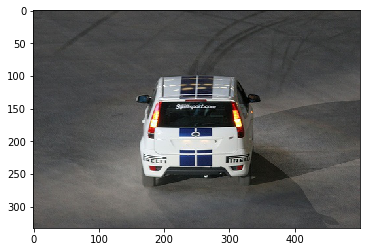

In [76]:
plt.imshow(nimg)


In [77]:
nimg = transformvalid(img).unsqueeze(0).to(device)

In [78]:
nimg.shape

torch.Size([1, 3, 250, 250])

In [79]:
prediction = model(nimg)

In [80]:
_, tpredict = torch.max(prediction.data, 1)

In [81]:
classes[tpredict[0].item()]

NameError: name 'classes' is not defined

In [82]:
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [75]:
for param in model.parameters():
    param.requires_grad = True

In [76]:

optimizer=torch.optim.Adam(model.parameters(),lr=0.00001)

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


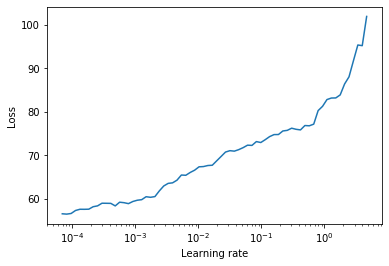

In [77]:
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=100, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset()

In [78]:

#optimizer=torch.optim.Adam(model.parameters(),lr=0.05)

In [79]:
#model

In [80]:
 
optimizer = torch.optim.Adam([{'params': model.classifier.parameters()},
                {'params': model.features.denseblock1.parameters(), 'lr': 1e-5},
                {'params': model.features.denseblock2.parameters(), 'lr': 1e-5},
                {'params': model.features.denseblock3.parameters(), 'lr': 1e-4},
                {'params': model.features.denseblock4.parameters(), 'lr': 1e-4}
            
                             ], lr=1e-3)

In [81]:
ltrain,lval = fit(15, model, criterion, optimizer, trainloader, valloader)

0 tensor(57.9233, device='cuda:0', grad_fn=<DivBackward0>) tensor(55.2545, device='cuda:0') tensor(0.0064, device='cuda:0')
1 tensor(44.7715, device='cuda:0', grad_fn=<DivBackward0>) tensor(50.7238, device='cuda:0') tensor(0.0045, device='cuda:0')
2 tensor(37.2798, device='cuda:0', grad_fn=<DivBackward0>) tensor(48.9916, device='cuda:0') tensor(0.0052, device='cuda:0')
3 tensor(33.1254, device='cuda:0', grad_fn=<DivBackward0>) tensor(46.8628, device='cuda:0') tensor(0.0064, device='cuda:0')
4 tensor(29.3789, device='cuda:0', grad_fn=<DivBackward0>) tensor(45.5611, device='cuda:0') tensor(0.0060, device='cuda:0')
5 tensor(27.8231, device='cuda:0', grad_fn=<DivBackward0>) tensor(45.5974, device='cuda:0') tensor(0.0054, device='cuda:0')
6 tensor(26.8052, device='cuda:0', grad_fn=<DivBackward0>) tensor(45.1239, device='cuda:0') tensor(0.0067, device='cuda:0')
7 tensor(25.8612, device='cuda:0', grad_fn=<DivBackward0>) tensor(45.1360, device='cuda:0') tensor(0.0059, device='cuda:0')
8 tensor

In [82]:
PATH="C:/Users/Iconsense/Documents/virat/abhi/bbox2"
torch.save({
            
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            
            
            }, PATH)





In [83]:
PATH="C:/Users/Iconsense/Documents/virat/abhi/bbox2"

In [ ]:
checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['model_state_dict'])
# modelB.load_state_dict(checkpoint['modelB_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# optimizerB.load_state_dict(checkpoint['optimizerB_state_dict'])

# modelA.eval()
# modelB.eval()
# # - or -
model.train()
# modelB.train()

In [ ]:
# criterion = nn.CrossEntropyLoss()
# optimizer=torch.optim.Adam(model.parameters(),lr=0.000001)
# lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
# lr_finder.range_test(trainloader, val_loader=valloader, end_lr=1, num_iter=100, step_mode="linear")
# lr_finder.plot(log_lr=False)
# lr_finder.reset()

In [ ]:
# for param in model.features.parameters():
#     param.requires_grad = True
    
# optimizer = torch.optim.Adam([{'params': model.classifier.parameters()},
#                 {'params': model.features.parameters(), 'lr': 0.00001}
#             ], lr=0.002)

In [ ]:

plt.plot(ltrain, label='Training loss', color='green')
plt.plot(lval, label='Validation loss', color ='black')
plt.legend(frameon=False)
plt.show()